In [2]:
import matplotlib
import descartes
import fiona
import fiona.crs
import shapely
from shapely.geometry import Polygon, shape, box, mapping
import geopandas as gpd

# Read proposed tiling (output of your first script)
tiles = fiona.open('../nts_snrc_250k/output.geojson')
# Read existing coverage (attached file)
coverage = fiona.open('../nts_snrc_250k/nts_snrc_250k.geojson')

In [3]:
df_coverage = []
for i in range(1,len(coverage)):
    cov = shape(coverage[i]['geometry'])
    df_coverage.append(cov)

In [4]:
df_tiles = []

for i in range(1,len(tiles)+1):
    tile = shape(tiles[i]['geometry'])
    df_tiles.append(tile)

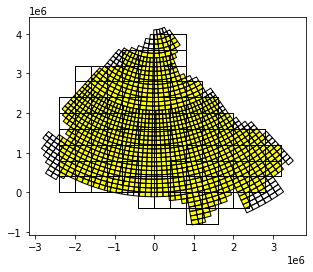

In [5]:
tile_geom = [shape(i) for i in df_tiles]
#print(tile_geom)
tile_gdf = gpd.GeoDataFrame({'geometry':tile_geom})
#print(tile_gdf)

coverage_gdf = gpd.GeoDataFrame({'geometry':[shape(j) for j in df_coverage]})
#print(coverage_gdf)

# intersection
tile_intersection = gpd.overlay(coverage_gdf,tile_gdf, how='intersection')

#print(tile_intersection)
ax = tile_intersection.plot(color='yellow')
coverage_gdf.plot(ax=ax, facecolor='none', edgecolor='k');
tile_gdf.plot(ax=ax, facecolor='none', edgecolor='k');

In [6]:
# write to geojson
#tile_intersection.to_file('../nts_snrc_250k/export/intersection.geojson', driver="GeoJSON")

In [7]:
#geojson_intersection = tile_intersection.to_json()
print(df_tiles[0])

POLYGON ((-2000000 0, -2000000 400000, -2400000 400000, -2400000 0, -2000000 0))


In [56]:
gen_list = []
for j in df_coverage:
    poly1 = []
    if j.intersects(df_tiles[0]):
        cur_index = coverage[df_coverage.index(j)]['properties']['NTS_SNRC']
        poly1.append(cur_index)
        gen_list += poly1
print(gen_list)
l = [1,2,3]
l.append(gen_list)
print(l)

['092A', '092B', '089H']
[1, 2, 3, ['092A', '092B', '089H']]


In [9]:
def poly_with_ids (n):
    gen_list = []
    for j in df_coverage:
        poly1 = []
        if j.intersects(df_tiles[n]):
            cur_index = coverage[df_coverage.index(j)]['properties']['NTS_SNRC']
            poly1.append(cur_index)
            gen_list += poly1
    return (gen_list)

id_lst=[]
for n in range(len(df_tiles)):
    lst = poly_with_ids (n)
    id_lst.append(lst)
print(id_lst)


[['092A', '092B', '089H'], ['092A', '092B', '092C', '089H', '091M', '092E', '092F', '108H', '095L', '340B', '092J', '092K', '096I', '102F', '101O', '101P', '108C', '102I'], ['109F', '108H', '055I', '096H', '103F', '096D', '092K', '096I', '093B', '093C', '093K', '102A', '103H', '108C', '102I', '102M', '102O', '102P', '103A', '096L', '096P'], ['096H', '103F', '103H', '103D', '097F', '096L', '096P', '097C', '117H', '109G', '103K', '103L', '108F', '104A', '104B', '109A'], ['105C', '105D', '105E', '105I', '097F', '097C', '098A', '117H', '104K', '104L', '109D', '098E', '114O', '114P'], ['119D', '115C', '115F', '105I', '109D', '115H', '115I', '115J', '098E', '114P', '095I', '115N', '116B'], ['069C', '092A', '092G', '082B', '082C', '082D', '082E'], ['069C', '092A', '092F', '092G', '075B', '083D', '082D', '082E', '082J', '082K', '082L', '109C', '093G', '340B', '092J', '096I', '092N', '092O', '096M', '093B', '108E'], ['109F', '109C', '112I', '093I', '103B', '093F', '093G', '096I', '096M', '093B'

In [10]:
for i,lst in enumerate(id_lst):
    f = open("tile"+str(i+1)+".txt","w")
    for item in lst:
        f.write(item+"\n")
    f.close()